<a href="https://colab.research.google.com/github/lialic/Neural-network-and-Genetic-algorithm/blob/master/LogisticRegression_CS410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/folio

/content/drive/.shortcut-targets-by-id/1iE9NMQ9Rlgj7EqOanL3mYmERy0v7IGA3/folio


# Import necessary libs

In [ ]:
import os
import cv2
import torch
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.feature import hog

In [ ]:
# Initialize two empty arrays
X = []
y = []
SCALE = 0.1

In [ ]:
def resize(image):
    return cv2.resize(image, (int(image.shape[1] * SCALE), (int(image.shape[0] * SCALE))))

In [ ]:
root = './'
for path in os.listdir():
    dir = os.path.join(root, path)
    for path_image in os.listdir(dir):
        # Read all images as gray scale and resize them
        matrix_img = cv2.imread(os.path.join(dir, path_image), 0)
        matrix_img = resize(matrix_img)

        # Add the matrix and its label into our set
        X.append(matrix_img)
        y.append(path)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

barbados cherry


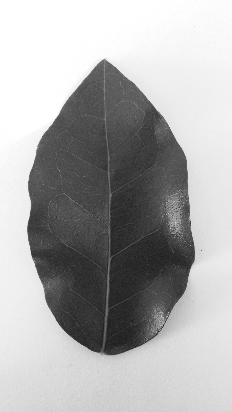

In [ ]:
print(y_train[100])
cv2_imshow(x_train[100])

# Creating new 2 training set by using 2 methods: H.O.G and all pixels


In [ ]:
def convert_to_1D(image):
    # Flatten the image out into a hxw matrix
    return np.reshape(image, image.shape[0] * image.shape[1])

In [ ]:
# Learning on all pixels
X_train_new = []
for x in x_train:
    X_train_new.append(convert_to_1D(x))

X_test_new = []
for x in x_test:
    X_test_new.append(convert_to_1D(x))


In [ ]:
def calculate_hog(image):
    return hog(image, orientations = 9, pixels_per_cell = (16,16)
               , cells_per_block = (2,2), block_norm = 'L2')

In [ ]:
x_train_new = []
x_test_new = []

for x in x_train:
    x_train_new.append(calculate_hog(x))

for x in x_test:
    x_test_new.append(calculate_hog(x))

# Performing Logistic Regression training process

In [ ]:
clf_all = LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)
clf_all

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1)

In [ ]:
clf_hog = LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)
clf_hog

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1)

In [ ]:
clf_all.fit(X_train_new, y_train)

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1)

In [ ]:
clf_hog.fit(x_train_new, y_train)

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1)

# Testing process

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
pred = clf_all.predict(X_test_new)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9166666666666666
                  precision    recall  f1-score   support

   ashanti blood       0.80      1.00      0.89         4
 barbados cherry       0.89      0.89      0.89         9
           betel       1.00      0.86      0.92         7
   bitter orange       1.00      1.00      1.00         3
caricature plant       0.83      1.00      0.91         5
coeur demoiselle       1.00      1.00      1.00         5
          coffee       0.75      0.75      0.75         8
          croton       1.00      1.00      1.00         8
       jackfruit       1.00      0.83      0.91         6
   mulberry leaf       1.00      1.00      1.00         5

        accuracy                           0.92        60
       macro avg       0.93      0.93      0.93        60
    weighted avg       0.92      0.92      0.92        60



In [ ]:
pred2 = clf_hog.predict(x_test_new)
print(accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

0.9166666666666666
                  precision    recall  f1-score   support

   ashanti blood       0.80      1.00      0.89         4
 barbados cherry       1.00      0.89      0.94         9
           betel       1.00      0.71      0.83         7
   bitter orange       1.00      1.00      1.00         3
caricature plant       0.80      0.80      0.80         5
coeur demoiselle       1.00      1.00      1.00         5
          coffee       0.73      1.00      0.84         8
          croton       1.00      1.00      1.00         8
       jackfruit       1.00      0.83      0.91         6
   mulberry leaf       1.00      1.00      1.00         5

        accuracy                           0.92        60
       macro avg       0.93      0.92      0.92        60
    weighted avg       0.93      0.92      0.92        60



coffee
Prediction 1: caricature plant
Prediction 2: coffee


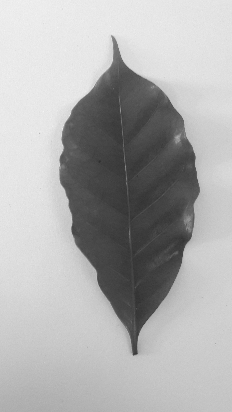

In [ ]:
print(y_test[0])
print(f'Prediction 1: {pred[0]}')
print(f'Prediction 2: {pred2[0]}')
cv2_imshow(x_test[0])